<a href="https://colab.research.google.com/github/Floccinaucinibilipilification/HelloKitty/blob/master/HelloKitty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

# Datasets

## Period's Dataset

In [3]:
period = pd.read_csv('Period.csv')

In [4]:
period.head()

,id,start_date,end_date,User_id
0,352,5/4/15,10/4/15,252
1,353,23/3/15,27/3/15,253
2,354,6/4/15,11/4/15,254
3,355,21/3/15,24/3/15,255
4,356,26/3/15,31/3/15,256


In [5]:
period.describe(include='all')

,id,start_date,end_date,User_id
count,34942.000000,34939,32168,34942.000000
unique,NaN,1582,1569,NaN
top,NaN,1/1/16,30/7/18,NaN
freq,NaN,53,45,NaN
mean,19891.592983,NaN,NaN,3427.557953
std,11016.619827,NaN,NaN,1856.939629
min,352.000000,NaN,NaN,252.000000
25%,10351.750000,NaN,NaN,1804.000000
50%,19961.500000,NaN,NaN,3364.000000
75%,29440.750000,NaN,NaN,4908.000000


In [6]:
period.drop('id', axis = 1, inplace=True)
period.dropna(inplace=True)
period.rename(columns={'User_id':'user_id'}, inplace=True)

In [7]:
period['start'] = pd.to_datetime(period['start_date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
period['end'] = pd.to_datetime(period['end_date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
period['length'] = period.end - period.start + datetime.timedelta(days=1)

In [8]:
period.drop(['start_date','end_date'], axis = 1, inplace=True)
period.head()

,user_id,start,end,length
0,252,2015-04-05,2015-04-10,6 days
1,253,2015-03-23,2015-03-27,5 days
2,254,2015-04-06,2015-04-11,6 days
3,255,2015-03-21,2015-03-24,4 days
4,256,2015-03-26,2015-03-31,6 days


## Symptom's Dataset

In [9]:
symptom = pd.read_csv('Symptom.csv')

In [10]:
symptom['symptom_date'] = pd.to_datetime(symptom['date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
symptom.drop(['id','date'], axis = 1, inplace=True)
symptom.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date
0,252,0,0,0,0,0,0,0,0,0,0,2015-04-11
1,257,0,0,0,46,0,0,0,0,0,0,2015-04-10
2,257,0,0,0,0,0,27,48,0,0,0,2015-04-11
3,263,0,0,0,0,0,0,0,0,0,0,2015-04-11
4,269,0,0,0,0,0,0,0,0,0,0,2015-04-11


In [11]:
sum(symptom['user_id'].value_counts()>5)

574

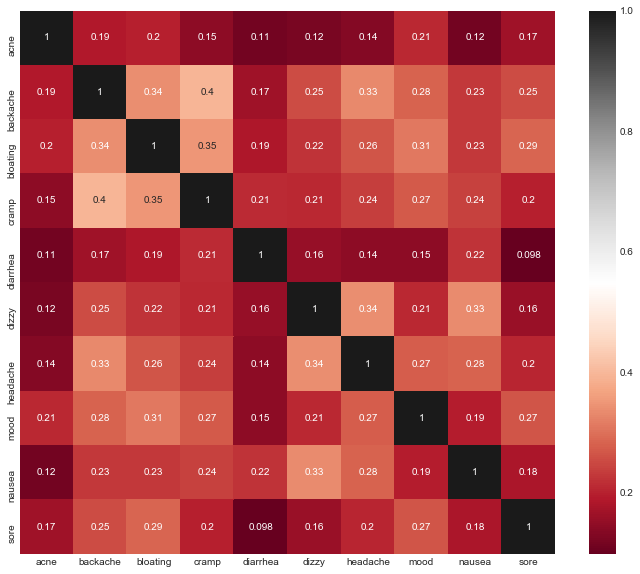

In [12]:
plt.figure(figsize=(12,10))
symptom_corr = symptom.drop(['user_id','symptom_date'], axis = 1).corr()
sns.heatmap(symptom_corr, annot=True, cmap='RdGy')

In [13]:
symptom.describe(include='all')

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date
count,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1340
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-26 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061-10-30 00:00:00
mean,3559.687537,11.383141,18.282490,18.885287,27.093176,6.690571,6.338958,14.825636,20.376406,6.813721,14.736530,NaN
std,1891.767966,21.793378,29.024682,29.092707,33.815321,18.430359,17.789091,26.607968,31.515778,18.911498,27.332721,NaN
min,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [14]:
symptom.user_id.nunique()

3953

## User's Dataset

In [15]:
user = pd.read_csv('User.csv')

In [16]:
user.rename(columns={'id':'user_id'}, inplace=True)
user.head()

,user_id,dob,cycle_length_initial,period_length_initial
0,252,NaN,28,6
1,253,NaN,30,5
2,254,NaN,28,6
3,255,NaN,30,4
4,256,NaN,25,6


In [17]:
user.describe(include='all')

,user_id,dob,cycle_length_initial,period_length_initial
count,6729.000000,440,6729.000000,6729.000000
unique,NaN,426,NaN,NaN
top,NaN,0002/10/01,NaN,NaN
freq,NaN,2,NaN,NaN
mean,3689.714816,NaN,28.710358,5.485362
std,1944.844016,NaN,2.728839,2.611793
min,252.000000,NaN,25.000000,2.000000
25%,2009.000000,NaN,28.000000,4.000000
50%,3691.000000,NaN,28.000000,5.000000
75%,5373.000000,NaN,29.000000,6.000000


In [18]:
user.user_id.nunique()

6729

# Combine three datasets

In [19]:
symptom_period = pd.merge(symptom, period, on='user_id')

In [20]:
symptom_period.describe(include='all')

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date,start,end,length
count,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279.000000,182279,182279,182279,182279
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1340,1533,1528,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-28 00:00:00,2018-02-21 00:00:00,2016-10-12 00:00:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454,443,539,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-28 00:00:00,2005-11-27 00:00:00,2011-11-27 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061-10-30 00:00:00,2097-04-17 00:00:00,2097-04-24 00:00:00,NaN
mean,3105.823529,10.809380,19.754514,21.040696,29.037733,7.483495,6.656916,16.354923,20.044081,6.817516,15.808491,NaN,NaN,NaN,6 days 00:36:21.815787
std,1696.480826,20.947716,29.826934,30.335270,34.143164,19.086395,18.273666,27.880682,31.467819,18.823793,27.904302,NaN,NaN,NaN,7 days 23:25:21.245235
min,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-21 days +00:00:00
25%,1703.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5 days 00:00:00


In [21]:
symptom_period.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date,start,end,length
0,252,0,0,0,0,0,0,0,0,0,0,2015-04-11,2015-04-05,2015-04-10,6 days
1,252,50,50,0,0,0,0,0,0,0,0,2015-04-13,2015-04-05,2015-04-10,6 days
2,252,0,0,0,0,0,0,0,0,0,0,2015-04-17,2015-04-05,2015-04-10,6 days
3,257,0,0,0,46,0,0,0,0,0,0,2015-04-10,2015-03-10,2015-03-15,6 days
4,257,0,0,0,46,0,0,0,0,0,0,2015-04-10,2015-04-11,2015-04-15,5 days


In [22]:
comb = pd.merge(symptom_period, user, on='user_id')

In [23]:
comb.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date,start,end,length,dob,cycle_length_initial,period_length_initial
0,252,0,0,0,0,0,0,0,0,0,0,2015-04-11,2015-04-05,2015-04-10,6 days,NaN,28,6
1,252,50,50,0,0,0,0,0,0,0,0,2015-04-13,2015-04-05,2015-04-10,6 days,NaN,28,6
2,252,0,0,0,0,0,0,0,0,0,0,2015-04-17,2015-04-05,2015-04-10,6 days,NaN,28,6
3,257,0,0,0,46,0,0,0,0,0,0,2015-04-10,2015-03-10,2015-03-15,6 days,NaN,30,6
4,257,0,0,0,46,0,0,0,0,0,0,2015-04-10,2015-04-11,2015-04-15,5 days,NaN,30,6


In [24]:
comb.user_id.value_counts()[:10]

1133    7462
2386    5162
514     2816
4011    2460
2253    2451
4207    2449
2566    2016
3265    1890
2047    1700
4324    1560
Name: user_id, dtype: int64

# User with maximum Records

In [60]:
user_1133 = period[period.user_id == 1133]
avani_1133 = user_1133
avani_1133.drop('length', axis = 1, inplace=True)
index = pd.MultiIndex.from_product([[1133],pd.date_range(start = avani_1133.start.min(), end = avani_1133.end.max())], names=['sser_id', 'date'])
new_df = pd.DataFrame(index = index, data = {'counts':0})

dates_list = new_df.index.get_level_values(1)
items_list = new_df.index.get_level_values(0)
for row in avani_1133.itertuples():
  new_df.counts[(items_list == row.user_id) & (dates_list>=row.start) & (dates_list<= row.end)] += 1

new_df #period or no period dataframe

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


counts
sser_id date              
1133    2015-10-03       1
        2015-10-04       1
        2015-10-05       1
        2015-10-06       1
        2015-10-07       1
        2015-10-08       1
        2015-10-09       1
        2015-10-10       1
        2015-10-11       1
        2015-10-12       0
        2015-10-13       0
        2015-10-14       0
        2015-10-15       0
        2015-10-16       0
        2015-10-17       0
        2015-10-18       0
        2015-10-19       0
        2015-10-20       0
        2015-10-21       0
        2015-10-22       0
        2015-10-23       0
        2015-10-24       0
        2015-10-25       0
        2015-10-26       0
        2015-10-27       0
        2015-10-28       0
        2015-10-29       0
        2015-10-30       0
        2015-10-31       0
        2015-11-01       0
...                    ...
        2019-02-09       1
        2019-02-10       0
        2019-02-11       0
        2019-02-12       0
        2019-02-13       0
        2019-02-14       0
        2019-02-15       0
        2019-02-16       0
        2019-02-17       0
        2019-02-18       0
        2019-02-19       0
        2019-02-20       0
        2019-02-21       0
        2019-02-22       0
        2019-02-23       0
        2019-02-24       0
        2019-02-25       0
        2019-02-26       0
        2019-02-27       0
        2019-02-28       0
        2019-03-01       0
        2019-03-02       0
        2019-03-03       1
        2019-03-04       1
        2019-03-05       1
        2019-03-06       1
        2019-03-07       1
        2019-03-08       1
        2019-03-09       1
        2019-03-10       1

[1255 rows x 1 columns]

In [26]:
user_1133.head()

,user_id,start,end,length
1472,1133,2015-10-03,2015-10-11,9 days
1473,1133,2015-11-02,2015-11-09,8 days
2266,1133,2015-11-30,2015-12-07,8 days
2936,1133,2015-12-26,2016-01-02,8 days
4006,1133,2016-01-26,2016-02-02,8 days


In [27]:
user_1133['cycle'] = user_1133['start'].shift(-1) - user_1133['start']
user_1133 = user_1133[['start', 'cycle']]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
user_1133

,start,cycle
1472,2015-10-03,30 days
1473,2015-11-02,28 days
2266,2015-11-30,26 days
2936,2015-12-26,31 days
4006,2016-01-26,60 days
5919,2016-03-26,28 days
6806,2016-04-23,29 days
7785,2016-05-22,47 days
9324,2016-07-08,29 days
10409,2016-08-06,30 days


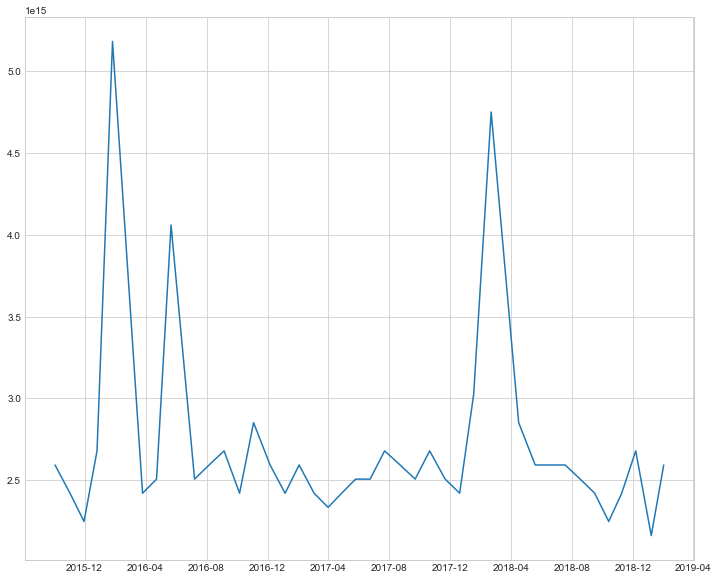

In [29]:
plt.figure(figsize=(12,10))
plt.plot(user_1133['start'][:-1],user_1133['cycle'][:-1])

In [30]:
# Remove those with cycle longer than 50 days
user_1133['cycle'] = user_1133['cycle'].apply(lambda x: x.days)
user_1133 = user_1133[user_1133['cycle']<50]

# Predict next month's start date with rolling average
** next month's start date = this month's start date + predicted length of this month's cycle **

In [31]:
# predict length of next month's cycle using the average length of the past three month's cycle
user_1133['rolling_cycle'] = user_1133['cycle'].rolling(window=3).mean().shift(1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
user_1133

,start,cycle,rolling_cycle
1472,2015-10-03,30.0,NaN
1473,2015-11-02,28.0,NaN
2266,2015-11-30,26.0,NaN
2936,2015-12-26,31.0,28.000000
5919,2016-03-26,28.0,28.333333
6806,2016-04-23,29.0,28.333333
7785,2016-05-22,47.0,29.333333
9324,2016-07-08,29.0,34.666667
10409,2016-08-06,30.0,35.000000
11450,2016-09-05,31.0,35.333333


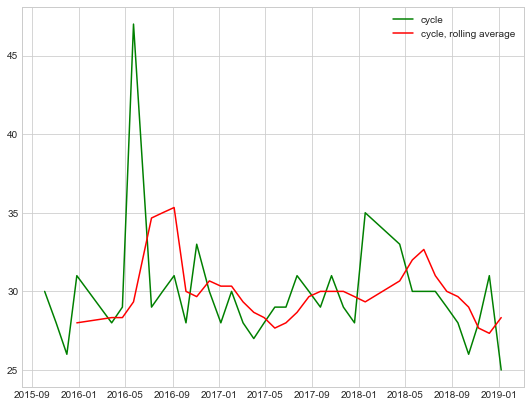

In [33]:
plt.figure(figsize=(9,7))
plt.plot(user_1133['start'][:-1],user_1133['cycle'][:-1],label='cycle',c="green")
plt.plot(user_1133['start'][3:-1],user_1133['rolling_cycle'][3:-1],label='cycle, rolling average', c='red')
plt.legend()

For example, we predict that the starting date of user 1133's next peroid is 2019-03-03 + (31+25+30)//3 = 2019-04-01.

## Correlation Between Symptoms and Period Cycle

In [34]:
Corr_comb=comb.drop(["user_id","symptom_date","period_length_initial","dob","start","end","length"],axis=1)
Corr_comb.head()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,cycle_length_initial
0,0,0,0,0,0,0,0,0,0,0,28
1,50,50,0,0,0,0,0,0,0,0,28
2,0,0,0,0,0,0,0,0,0,0,28
3,0,0,0,46,0,0,0,0,0,0,30
4,0,0,0,46,0,0,0,0,0,0,30


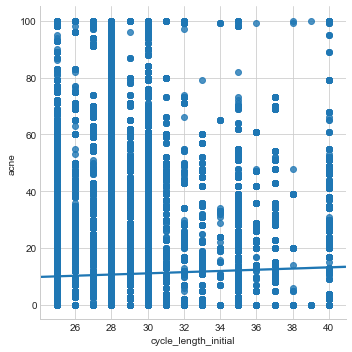

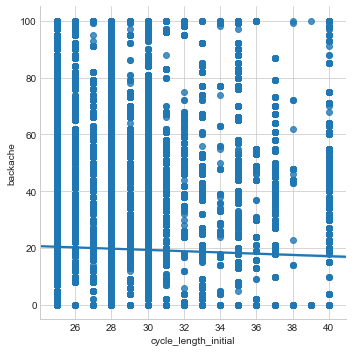

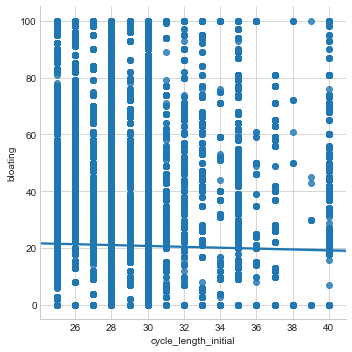

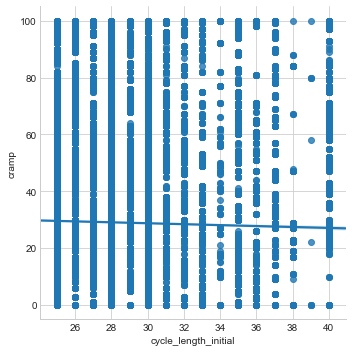

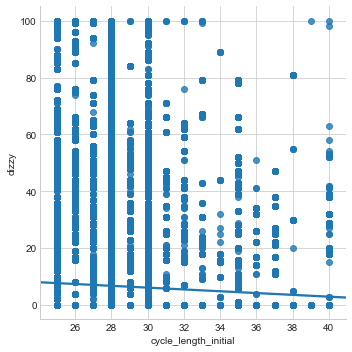

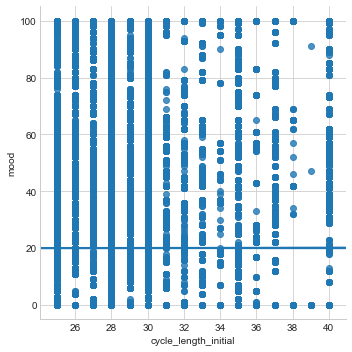

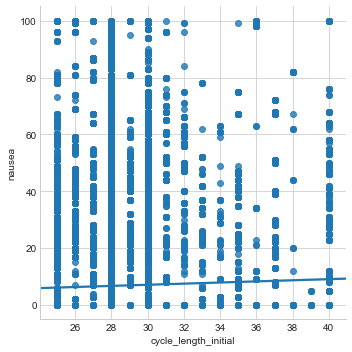

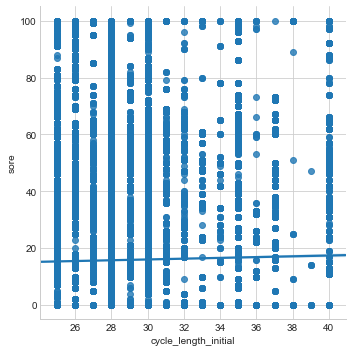

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
sns.lmplot(x='cycle_length_initial', y='acne',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='backache',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='bloating',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='cramp',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='dizzy',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='mood',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='nausea',data=Corr_comb)
sns.lmplot(x='cycle_length_initial', y='sore',data=Corr_comb)

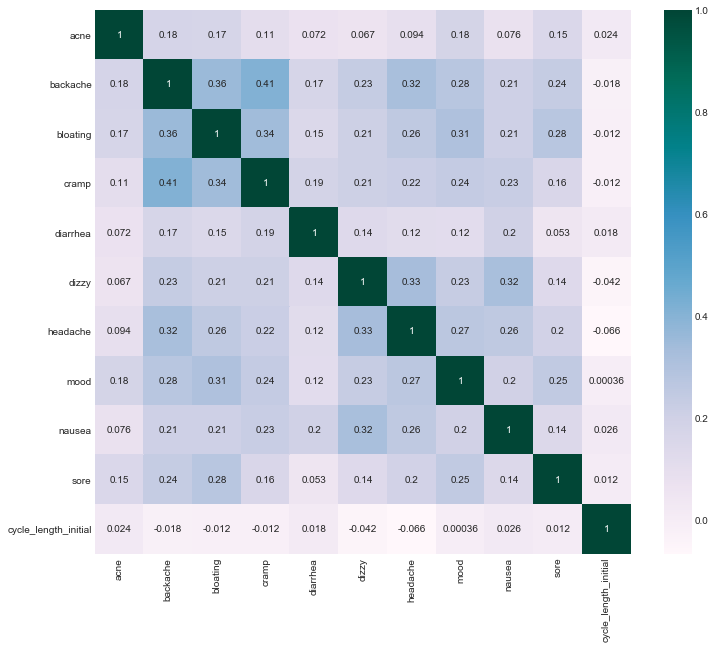

In [36]:
plt.rcParams["figure.figsize"] = (12,10)
#Corr_comb_relation=Corr_comb.corr(method="spearman")
#Corr_comb_relation=Corr_comb.corr(method="kendall")
Corr_comb_relation=Corr_comb.corr(method="pearson")
sns.heatmap(Corr_comb_relation, annot=True, cmap='PuBuGn')

In [50]:
result_relation=Corr_comb_relation.drop(["backache","bloating","cramp","dizzy","headache"],axis=1)
result_relation=result_relation.drop(["backache","bloating","cramp","dizzy","headache"],axis=0)
#pearson=diahrea,mood,nausea,sore
#spearman=acne,diahreaa,nausea,sore
#kendall=acne,diahrea,nausea,sore
result_relation.head()

,acne,diarrhea,mood,nausea,sore,cycle_length_initial
acne,1.000000,0.071764,0.181253,0.076433,0.150747,0.024483
diarrhea,0.071764,1.000000,0.115080,0.202404,0.053113,0.018495
mood,0.181253,0.115080,1.000000,0.198738,0.247545,0.000359
nausea,0.076433,0.202404,0.198738,1.000000,0.143549,0.025526
sore,0.150747,0.053113,0.247545,0.143549,1.000000,0.012104


### Strongly Related symptoms with Cycle_length: _acne_, _diahrea_, _nausea_, _sore_

# Predicting reverse relation with symptoms

### Trying to understand whether these symptoms are derived from the abnormal period length. 

In [51]:
User_1133=comb[comb.user_id==1133]
User_1133['cycle'] = User_1133['start'].shift(-1) - User_1133['start']
User_1133['cycle'] = User_1133['cycle'].apply(lambda x: x.days)
User_1133 = User_1133[User_1133['cycle']<50]
#User_1133=User_1133.drop(["start"])
User_1133
#user_1133=user_1133.dropna(subset=["period_length_initial"],axis=0)
#user_1133na=user_1133[user_1133.cycle_length_initial==0]
#user_1133na.describe()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date,start,end,length,dob,cycle_length_initial,period_length_initial,cycle
20969,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2015-10-03,2015-10-11,9 days,30/4/79,28,9,30.0
20970,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2015-11-02,2015-11-09,8 days,30/4/79,28,9,28.0
20971,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2015-11-30,2015-12-07,8 days,30/4/79,28,9,26.0
20972,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2015-12-26,2016-01-02,8 days,30/4/79,28,9,31.0
20974,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-03-26,2016-04-02,8 days,30/4/79,28,9,28.0
20975,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-04-23,2016-04-30,8 days,30/4/79,28,9,29.0
20976,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-05-22,2016-05-30,9 days,30/4/79,28,9,47.0
20977,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-07-08,2016-07-14,7 days,30/4/79,28,9,29.0
20978,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-08-06,2016-08-13,8 days,30/4/79,28,9,30.0
20979,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02,2016-09-05,2016-09-10,6 days,30/4/79,28,9,31.0


In [52]:
Symptom_1133=symptom[symptom.user_id==1133]
Symptom_1133.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,symptom_date
750,1133,0,98,80,100,0,70,100,56,97,100,2015-11-02
767,1133,0,99,98,100,59,0,0,95,0,46,2015-11-03
798,1133,53,0,0,46,0,52,73,0,0,0,2015-11-05
1144,1133,22,63,57,71,0,59,81,83,0,67,2015-11-30
1179,1133,0,68,71,71,0,0,0,0,0,73,2015-12-03
